# Importação

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
    
%matplotlib inline

# Leitura dos dados

In [2]:
df = pd.read_csv('dados/2019-09-09_Disque_Economia_-_Base_de_Dados-limpo.csv', sep = ',', encoding = 'latin-1', infer_datetime_format = True)

In [3]:
df.head()

,Unnamed: 0,DATA_PESQUISA,PRECO_PESQUISADO,CODIGO_ESTABELECIMENTO,CODIGO_ESTABELECIMENTO_FILIAL,ENDERECO_ESTABELECIMENTO,NUMERO_ENDERECO_ESTABELECIMENTO,TELEFONE_ESTABELECIMENTO,CIDADE_ESTABELECIMENTO,ESTADO_ESTABELECIMENTO,...,DESCRICAO_CATEGORIA_PRODUTO,CODIGO_PRODUTO,PRODUTO_DESCRICAO,PRODUTO_QTD_EMBALAGEM,CODIGO_TIPO_UNIDADE_MEDIDA_PRODUTO,TIPO_UNIDADE_MEDIDA_PRODUTO_DESCRICAO,TIPO_UNIDADE_MEDIDA_PRODUTO_SIGLA,CODIGO_TIPO_EMBALAGEM_PRODUTO,TIPO_EMBALAGEM_PRODUTO_DESCRICAO,TIPO_EMBALAGEM_PRODUTO_SIGLA
0,0,2019-06-18,4.95,1,88,ROD. BR 116,10000.0,39013933,CURITIBA,PR,...,15,445,"abobrinha ""verde""",1,1,KILOGRAMA,KG,8,GRANEL,GRA
1,1,2019-06-18,2.49,1,88,ROD. BR 116,10000.0,39013933,CURITIBA,PR,...,15,447,agriao,1,5,UNIDADE,UN,10,MACO,MAC
2,2,2019-06-18,3.99,1,88,ROD. BR 116,10000.0,39013933,CURITIBA,PR,...,15,452,"batata ""lavada"" ( + barato )",1,1,KILOGRAMA,KG,8,GRANEL,GRA
3,3,2019-06-18,11.90,1,88,ROD. BR 116,10000.0,39013933,CURITIBA,PR,...,15,454,batata salsa,1,1,KILOGRAMA,KG,8,GRANEL,GRA
4,4,2019-06-18,3.99,1,88,ROD. BR 116,10000.0,39013933,CURITIBA,PR,...,15,461,couve flor,1,5,UNIDADE,UN,19,UNIDADE,UN


In [83]:
df.columns

Index(['Unnamed: 0', 'DATA_PESQUISA', 'PRECO_PESQUISADO',
       'CODIGO_ESTABELECIMENTO', 'CODIGO_ESTABELECIMENTO_FILIAL',
       'ENDERECO_ESTABELECIMENTO', 'NUMERO_ENDERECO_ESTABELECIMENTO',
       'TELEFONE_ESTABELECIMENTO', 'CIDADE_ESTABELECIMENTO',
       'ESTADO_ESTABELECIMENTO', 'CODIGO_BAIRRO', 'DESCRICAO_BAIRRO',
       'ESTABELECIMENTO_REDE', 'ESTABELECIMENTO_RAZAO_SOCIAL',
       'CODIGO_CATEGORIA_PRODUTO', 'DESCRICAO_CATEGORIA_PRODUTO',
       'CODIGO_PRODUTO', 'PRODUTO_DESCRICAO', 'PRODUTO_QTD_EMBALAGEM',
       'CODIGO_TIPO_UNIDADE_MEDIDA_PRODUTO',
       'TIPO_UNIDADE_MEDIDA_PRODUTO_DESCRICAO',
       'TIPO_UNIDADE_MEDIDA_PRODUTO_SIGLA', 'CODIGO_TIPO_EMBALAGEM_PRODUTO',
       'TIPO_EMBALAGEM_PRODUTO_DESCRICAO', 'TIPO_EMBALAGEM_PRODUTO_SIGLA'],
      dtype='object')

In [4]:
df.shape

(456307, 25)

## Visualização

In [5]:
dfT = df.groupby(['DATA_PESQUISA','ESTABELECIMENTO_REDE'])['PRECO_PESQUISADO'].mean().reset_index()
dfP = dfT.pivot('DATA_PESQUISA', 'ESTABELECIMENTO_REDE', 'PRECO_PESQUISADO')

Text(0.5, 1, 'Variação dos preços por estabelecimento')

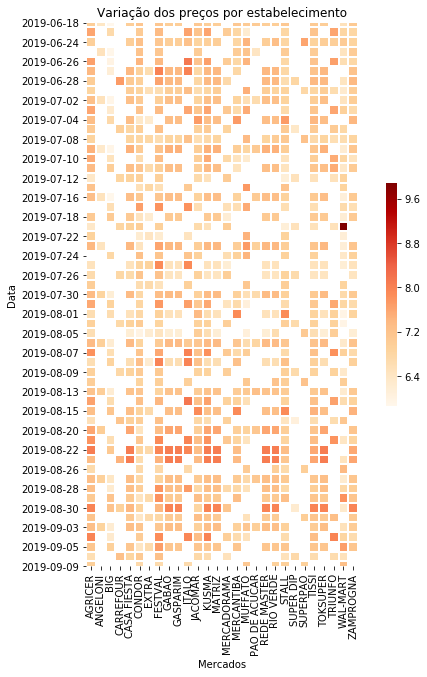

In [6]:
plt.figure(figsize=(10,10))
g = sns.heatmap(
    dfP, 
    square=True, # make cells square
    cbar_kws={'fraction' : 0.02}, # shrink colour bar
    cmap='OrRd',
    linewidth=1 # space between cells
)
plt.xlabel("Mercados")
plt.ylabel("Data")
plt.title("Variação dos preços por estabelecimento")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56],
 <a list of 57 Text xticklabel objects>)

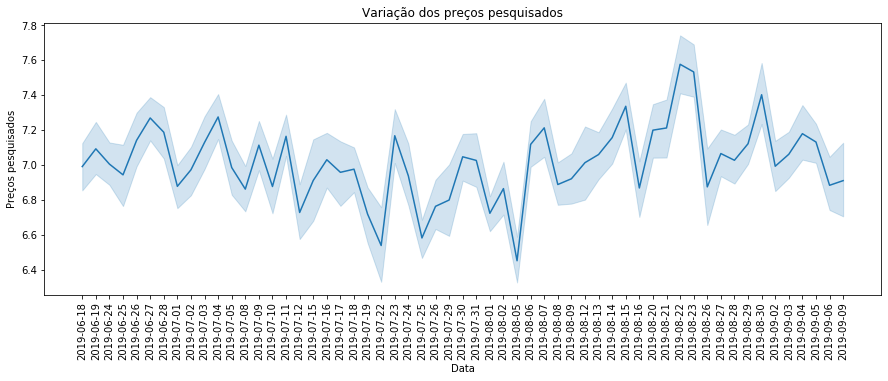

In [7]:
fig, cx = plt.subplots(figsize=(15, 5))

sns.lineplot(x="DATA_PESQUISA", y='PRECO_PESQUISADO', data=df)
plt.xlabel("Data")
plt.ylabel("Preços pesquisados")
plt.title("Variação dos preços pesquisados")
plt.xticks(rotation=90)

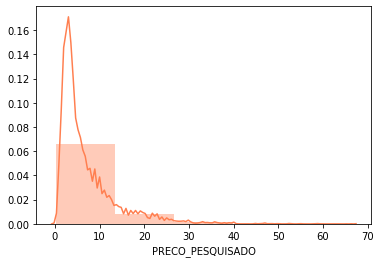

In [8]:
sns.distplot(df['PRECO_PESQUISADO'], bins=5, color = 'coral');

## Agrupamento - produtos

In [22]:
dfY = df.groupby(['CODIGO_PRODUTO', 'CODIGO_TIPO_EMBALAGEM_PRODUTO','CODIGO_TIPO_UNIDADE_MEDIDA_PRODUTO', 'PRODUTO_QTD_EMBALAGEM'])[['PRECO_PESQUISADO']].mean().reset_index()
dfY.shape

(347, 5)

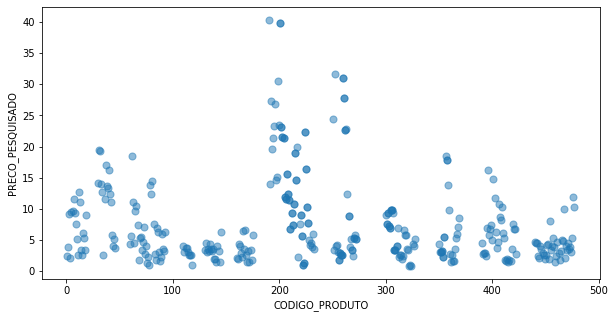

In [15]:
dfY.plot.scatter(x='CODIGO_PRODUTO', y='PRECO_PESQUISADO', s = 50, alpha = 0.5, figsize=(10,5))

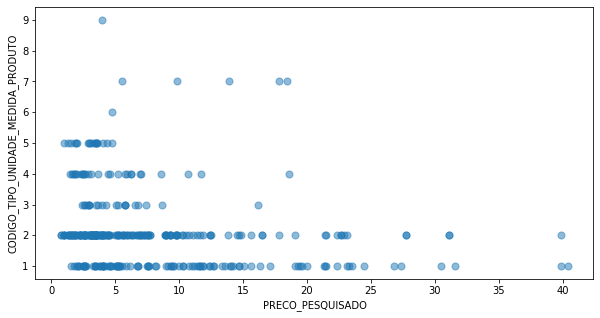

In [16]:
dfY.plot.scatter(x='PRECO_PESQUISADO', y='CODIGO_TIPO_UNIDADE_MEDIDA_PRODUTO', s = 50, alpha = 0.5, figsize=(10,5))

In [23]:
dfY_norm = pd.DataFrame(
                  MinMaxScaler().fit_transform(dfY), 
                  index = dfY.index, 
                  columns=dfY.columns)

dfY_norm.head()

,CODIGO_PRODUTO,CODIGO_TIPO_EMBALAGEM_PRODUTO,CODIGO_TIPO_UNIDADE_MEDIDA_PRODUTO,PRODUTO_QTD_EMBALAGEM,PRECO_PESQUISADO
0,0.000000,0.277778,0.375,0.109151,0.043992
1,0.002101,0.555556,0.125,0.550165,0.079562
2,0.004202,0.555556,0.000,0.004410,0.211484
3,0.006303,0.555556,0.000,0.000000,0.034301
4,0.008403,0.555556,0.000,0.004410,0.221849


In [24]:
kmeans1 = KMeans(n_clusters = 10, init = 'k-means++', random_state = 100) 
kmeans1.fit(dfY_norm) 
dfY['Agrupamento 1'] = kmeans1.labels_

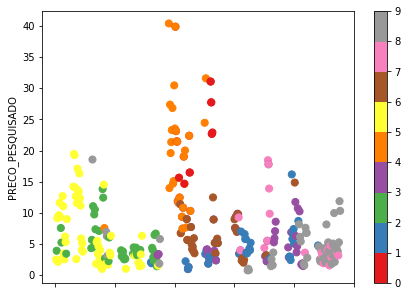

In [25]:
dfY.plot.scatter(x='CODIGO_PRODUTO', y='PRECO_PESQUISADO', s = 50, c = kmeans1.labels_, colormap='Set1', figsize=(7,5))

In [26]:
df2 = df[['CODIGO_PRODUTO', 'PRODUTO_DESCRICAO', 'CODIGO_TIPO_EMBALAGEM_PRODUTO']]

In [27]:
df2 = df2.merge(dfY, how = 'left', on = 'CODIGO_PRODUTO')
df2

,CODIGO_PRODUTO,PRODUTO_DESCRICAO,CODIGO_TIPO_EMBALAGEM_PRODUTO_x,CODIGO_TIPO_EMBALAGEM_PRODUTO_y,CODIGO_TIPO_UNIDADE_MEDIDA_PRODUTO,PRODUTO_QTD_EMBALAGEM,PRECO_PESQUISADO,Agrupamento 1
0,445,"abobrinha ""verde""",8,8,1,1,4.025356,8
1,447,agriao,10,10,5,1,2.942070,7
2,452,"batata ""lavada"" ( + barato )",8,8,1,1,4.345636,8
3,454,batata salsa,8,8,1,1,8.123669,8
4,461,couve flor,19,19,5,1,4.736980,7
5,463,laranja pera,8,8,1,1,1.795377,8
6,468,melancia,8,8,1,1,2.106453,8
7,470,pepino,8,8,1,1,3.453742,8
8,472,rabanete,19,19,5,1,3.527202,7
9,2,adoÃ§ante em po/ acucar light,11,11,2,500,3.906267,2


## Agrupamento por estabelecimento

In [10]:
df_cesta = df[(df['DESCRICAO_CATEGORIA_PRODUTO']==2) | (df['DESCRICAO_CATEGORIA_PRODUTO']==4)| (df['DESCRICAO_CATEGORIA_PRODUTO']==5)] 
df_cesta.head()

,Unnamed: 0,DATA_PESQUISA,PRECO_PESQUISADO,CODIGO_ESTABELECIMENTO,CODIGO_ESTABELECIMENTO_FILIAL,ENDERECO_ESTABELECIMENTO,NUMERO_ENDERECO_ESTABELECIMENTO,TELEFONE_ESTABELECIMENTO,CIDADE_ESTABELECIMENTO,ESTADO_ESTABELECIMENTO,...,DESCRICAO_CATEGORIA_PRODUTO,CODIGO_PRODUTO,PRODUTO_DESCRICAO,PRODUTO_QTD_EMBALAGEM,CODIGO_TIPO_UNIDADE_MEDIDA_PRODUTO,TIPO_UNIDADE_MEDIDA_PRODUTO_DESCRICAO,TIPO_UNIDADE_MEDIDA_PRODUTO_SIGLA,CODIGO_TIPO_EMBALAGEM_PRODUTO,TIPO_EMBALAGEM_PRODUTO_DESCRICAO,TIPO_EMBALAGEM_PRODUTO_SIGLA
17,17,2019-06-18,9.98,14,53,AV. VICTOR FERREIRA DO AMARAL,1048.0,3544-6200,CURITIBA,PR,...,2,34,arroz branco tipo 1 ( + barato ),5,1,KILOGRAMA,KG,11,PACOTE,PCT
18,18,2019-06-18,9.98,2,53,RUA JOAO BETTEGA,3930.0,38882253,CURITIBA,PR,...,2,34,arroz branco tipo 1 ( + barato ),5,1,KILOGRAMA,KG,11,PACOTE,PCT
19,19,2019-06-18,11.98,14,53,AV. VICTOR FERREIRA DO AMARAL,1048.0,3544-6200,CURITIBA,PR,...,2,36,"arroz parboilizado tipo 1 ""buriti""",5,1,KILOGRAMA,KG,11,PACOTE,PCT
20,20,2019-06-18,11.98,2,53,RUA JOAO BETTEGA,3930.0,38882253,CURITIBA,PR,...,2,36,"arroz parboilizado tipo 1 ""buriti""",5,1,KILOGRAMA,KG,11,PACOTE,PCT
21,21,2019-06-18,7.29,14,53,AV. VICTOR FERREIRA DO AMARAL,1048.0,3544-6200,CURITIBA,PR,...,2,43,"feijao carioquinha ""caldo bom""",1,1,KILOGRAMA,KG,11,PACOTE,PCT


In [11]:
df_prod = df_cesta.groupby(['CODIGO_ESTABELECIMENTO'])[['PRODUTO_DESCRICAO']].count().reset_index()
df_prod.head()

,CODIGO_ESTABELECIMENTO,PRODUTO_DESCRICAO
0,1,1538
1,2,5169
2,3,315
3,4,4172
4,6,2492


In [12]:
df_preco = df_cesta.groupby(['CODIGO_ESTABELECIMENTO'])[['PRECO_PESQUISADO']].mean().reset_index()
df_preco.head()

,CODIGO_ESTABELECIMENTO,PRECO_PESQUISADO
0,1,5.570611
1,2,6.207255
2,3,5.670667
3,4,5.894736
4,6,5.893567


In [13]:
dfX = df_preco.merge(df_prod, how = 'left', on = 'CODIGO_ESTABELECIMENTO')
dfX.head()

,CODIGO_ESTABELECIMENTO,PRECO_PESQUISADO,PRODUTO_DESCRICAO
0,1,5.570611,1538
1,2,6.207255,5169
2,3,5.670667,315
3,4,5.894736,4172
4,6,5.893567,2492


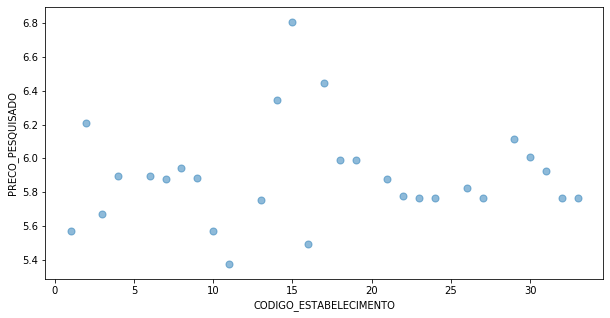

In [25]:
cx = dfX.plot.scatter(x='CODIGO_ESTABELECIMENTO', y='PRECO_PESQUISADO', s = 50, alpha = 0.5, figsize=(10,5))

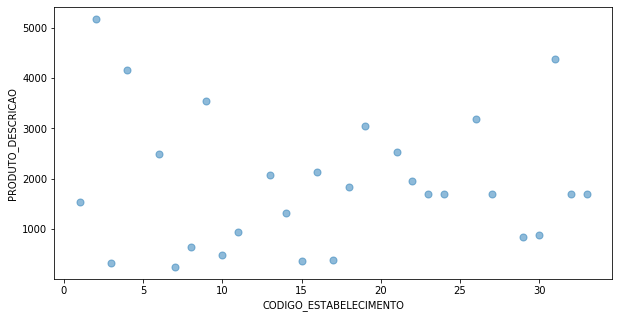

In [26]:
dx = dfX.plot.scatter(x='CODIGO_ESTABELECIMENTO', y='PRODUTO_DESCRICAO', s = 50, alpha = 0.5, figsize=(10,5))

In [28]:
dfX_norm = pd.DataFrame(
                  MinMaxScaler().fit_transform(dfX), 
                  index = dfX.index, 
                  columns=dfX.columns)

dfX_norm.head()

,CODIGO_ESTABELECIMENTO,PRECO_PESQUISADO,PRODUTO_DESCRICAO
0,0.00000,0.137400,0.261391
1,0.03125,0.580978,1.000000
2,0.06250,0.207114,0.012612
3,0.09375,0.363233,0.797193
4,0.15625,0.362418,0.455452


In [29]:
kmeans1 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 100) 
kmeans1.fit(dfX_norm) 
dfX['Agrupamento 2'] = kmeans1.labels_

In [30]:
dfX.head()

,CODIGO_ESTABELECIMENTO,PRECO_PESQUISADO,PRODUTO_DESCRICAO,Agrupamento
0,1,5.570611,1538,0
1,2,6.207255,5169,2
2,3,5.670667,315,0
3,4,5.894736,4172,2
4,6,5.893567,2492,2


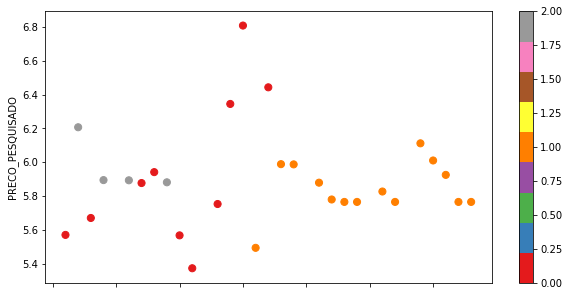

In [32]:
dfX.plot.scatter(x='CODIGO_ESTABELECIMENTO', y='PRECO_PESQUISADO', s = 50, c = kmeans1.labels_, colormap='Set1', figsize=(10,5))

In [36]:
dfX.rename(columns={'PRECO_PESQUISADO':'MEDIA_PRECOS', 'PRODUTO_DESCRICAO':'COUNT_PRODUTOS'}, inplace = True)
dfX.head()

,CODIGO_ESTABELECIMENTO,MEDIA_PRECOS,COUNT_PRODUTOS,Agrupamento
0,1,5.570611,1538,0
1,2,6.207255,5169,2
2,3,5.670667,315,0
3,4,5.894736,4172,2
4,6,5.893567,2492,2


In [37]:
df2 = df_cesta.merge(dfX, how = 'left', on = 'CODIGO_ESTABELECIMENTO')
df2.head()

,DATA_PESQUISA,PRECO_PESQUISADO,CODIGO_ESTABELECIMENTO,CODIGO_ESTABELECIMENTO_FILIAL,ENDERECO_ESTABELECIMENTO,NUMERO_ENDERECO_ESTABELECIMENTO,COMPLEMENTO_ENDERECO_ESTABELECIMENTO,TELEFONE_ESTABELECIMENTO,CIDADE_ESTABELECIMENTO,ESTADO_ESTABELECIMENTO,...,PRODUTO_QTD_EMBALAGEM,CODIGO_TIPO_UNIDADE_MEDIDA_PRODUTO,TIPO_UNIDADE_MEDIDA_PRODUTO_DESCRICAO,TIPO_UNIDADE_MEDIDA_PRODUTO_SIGLA,CODIGO_TIPO_EMBALAGEM_PRODUTO,TIPO_EMBALAGEM_PRODUTO_DESCRICAO,TIPO_EMBALAGEM_PRODUTO_SIGLA,MEDIA_PRECOS,COUNT_PRODUTOS,Agrupamento
0,18/06/2019,9.98,14,53,AV. VICTOR FERREIRA DO AMARAL,1048.0,NaN,3544-6200,CURITIBA,PR,...,5.0,1,KILOGRAMA,KG,11,PACOTE,PCT,6.345064,1327,0
1,18/06/2019,9.98,2,53,RUA JOAO BETTEGA,3930.0,NaN,38882253,CURITIBA,PR,...,5.0,1,KILOGRAMA,KG,11,PACOTE,PCT,6.207255,5169,2
2,18/06/2019,11.98,14,53,AV. VICTOR FERREIRA DO AMARAL,1048.0,NaN,3544-6200,CURITIBA,PR,...,5.0,1,KILOGRAMA,KG,11,PACOTE,PCT,6.345064,1327,0
3,18/06/2019,11.98,2,53,RUA JOAO BETTEGA,3930.0,NaN,38882253,CURITIBA,PR,...,5.0,1,KILOGRAMA,KG,11,PACOTE,PCT,6.207255,5169,2
4,18/06/2019,7.29,14,53,AV. VICTOR FERREIRA DO AMARAL,1048.0,NaN,3544-6200,CURITIBA,PR,...,1.0,1,KILOGRAMA,KG,11,PACOTE,PCT,6.345064,1327,0


In [39]:
df_mercados = df2[['ESTABELECIMENTO_RAZAO_SOCIAL', 'Agrupamento']].drop_duplicates().reset_index().drop(columns = 'index').sort_values(by = 'Agrupamento')
df_mercados

,ESTABELECIMENTO_RAZAO_SOCIAL,Agrupamento
0,IRMAOS MUFFATO & CIA. LTDA.,0
24,SUPERMERCADO SUPERPAO LTDA.,0
22,DEMETERCO & CIA. LTDA.,0
25,DIPLOMATA INDUSTRIAL E COMERCIAL LTDA,0
11,CIA. BRASILEIRA DE DISTRIBUICAO,0
8,A. ANGELONI E CIA. LTDA.,0
13,FADALEAL SUPERMERCADOS LTDA.,0
26,CARREFOUR COMERCIO E INDUSTRIA LTDA.,0
2,SONAE DISTRIBUICAO BRASIL S.A.,0
23,TRIUNFO COM PROD ALIMENTICIOS LTDA,1


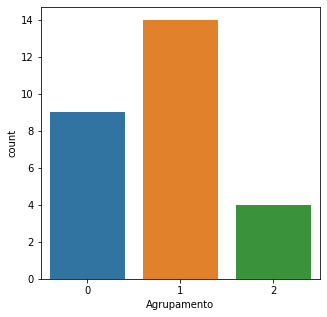

In [40]:
fig, dx = plt.subplots(figsize=(5, 5))
dx = sns.countplot(x="Agrupamento", data=df_mercados)

In [47]:
df2.groupby(['ESTABELECIMENTO_RAZAO_SOCIAL'])[['Agrupamento','MEDIA_PRECOS', 'COUNT_PRODUTOS']].max().sort_values(by = 'Agrupamento')

,Agrupamento,MEDIA_PRECOS,COUNT_PRODUTOS
ESTABELECIMENTO_RAZAO_SOCIAL,,,
A. ANGELONI E CIA. LTDA.,0,6.808654,364
CARREFOUR COMERCIO E INDUSTRIA LTDA.,0,5.941896,633
CIA. BRASILEIRA DE DISTRIBUICAO,0,5.670667,486
DEMETERCO & CIA. LTDA.,0,5.373408,942
DIPLOMATA INDUSTRIAL E COMERCIAL LTDA,0,6.443438,384
FADALEAL SUPERMERCADOS LTDA.,0,5.753300,2070
SUPERMERCADO SUPERPAO LTDA.,0,5.877312,253
IRMAOS MUFFATO & CIA. LTDA.,0,6.345064,1327
SONAE DISTRIBUICAO BRASIL S.A.,0,5.570611,1538
